## DT on Bank Marketing dataset

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import sklearn.model_selection as cv
import sklearn              

In [5]:
## Load dataset
url_learn = "../../../data/learning/BankCleanLearn.csv"
url_test = "../../../data/test/BankCleanTest.csv"
data_learn = pd.read_csv(url_learn,sep=';')
data_learn.head()
data_test = pd.read_csv(url_test,sep=';')

In [6]:
## Separate data from labels
X_learn=data_learn.drop(['y'], axis=1)
y_learn=data_learn['y']

print(X_learn.shape)
X_learn.head()

X_test=data_test.drop(['y'], axis=1)
y_test=data_test['y']


(28832, 20)


In [50]:
## Transform to numerical dataset
#Xn=pd.get_dummies(X)
#Xn.head()
Xn_learn = pd.get_dummies(X_learn)
Xn_test = pd.get_dummies(X_test)
Xn_learn.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,prev_contacted_no,prev_contacted_yes
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,0,0,0,1,0,1,0
1,59,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,1,0,0,0,0,1,0,1,0
2,41,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,0,0,0,1,0,1,0
3,25,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,0,0,0,1,0,1,0
4,29,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,0,0,0,1,0,1,0


In [10]:
## Split into learning and validation
#(X_train, X_test,  y_train, y_test) = cv.train_test_split(Xn, y, test_size=.3, random_state=1)

In [14]:
## Train Naive Bayes model
"""
from sklearn.naive_bayes import BernoulliNB  # For binari features (f.i. word appears or not in document)
from statsmodels.stats.proportion import proportion_confint

clf = BernoulliNB()
pred = clf.fit(X_train, y_train).predict(X_test)
print(sklearn.metrics.confusion_matrix(y_test, pred))
print()
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, pred))
print()
print(sklearn.metrics.classification_report(y_test, pred))
epsilon = sklearn.metrics.accuracy_score(y_test, pred)
proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test')
scores = sklearn.model_selection.cross_val_score(clf, Xn, y, cv=10)
print(scores)
print(np.mean(scores))
"""

[[6936  771]
 [ 578  365]]

Accuracy: 0.8440462427745665

              precision    recall  f1-score   support

          no       0.92      0.90      0.91      7707
         yes       0.32      0.39      0.35       943

   micro avg       0.84      0.84      0.84      8650
   macro avg       0.62      0.64      0.63      8650
weighted avg       0.86      0.84      0.85      8650

[0.88730929 0.88730929 0.89459085 0.91643551 0.90322581 0.91155047
 0.63024627 0.3957683  0.71929216 0.50346981]
0.7649197751312267


[[10034   930]
 [  903   489]]

Accuracy on test set: 0.8516510197474911

             precision    recall  f1-score   support

         no       0.92      0.92      0.92     10964
        yes       0.34      0.35      0.35      1392

avg / total       0.85      0.85      0.85     12356

Confidence interval:  (0.8452653930803021, 0.8578508797546127)


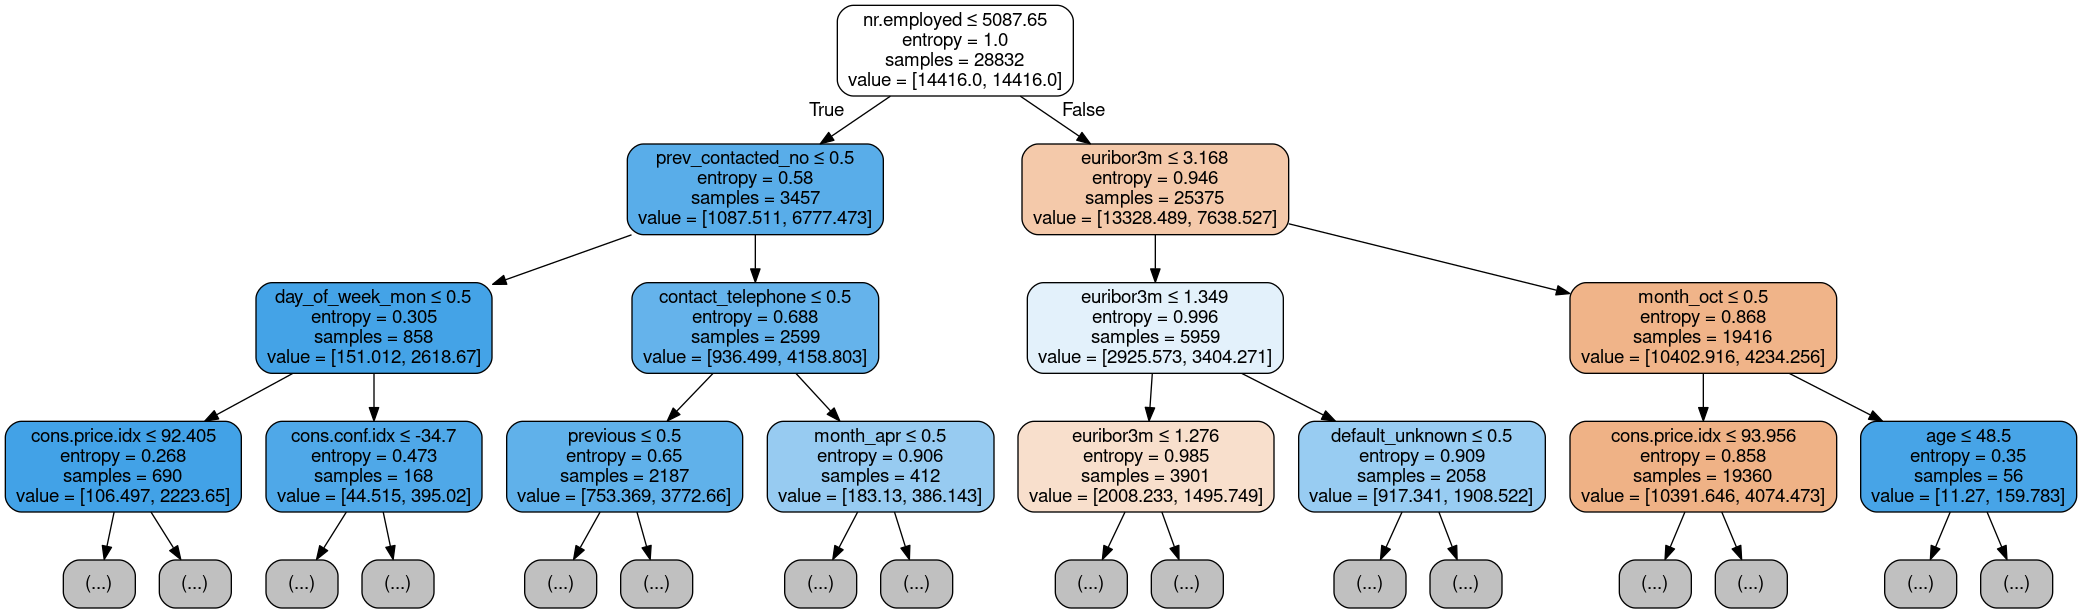

In [51]:
from statsmodels.stats.proportion import proportion_confint
from sklearn import tree
from sklearn.externals.six import StringIO  
import pydot
from IPython.display import Image
#import cmdline

#from imblearn.under_sampling import RandomUnderSampler,CondensedNearestNeighbour,InstanceHardnessThreshold
#from imblearn.over_sampling import RandomOverSampler

Xx, yy = Xn_learn, y_learn
#rus = RandomUnderSampler(random_state=42)
#rus = CondensedNearestNeighbour(random_state=42)
#rus = RandomOverSampler(random_state=42)
#Xx, yy = rus.fit_resample(Xx, yy)
clf = tree.DecisionTreeClassifier(criterion='entropy',class_weight='balanced')
pred = clf.fit(Xx, yy).predict(Xn_test)
print(sklearn.metrics.confusion_matrix(y_test, pred))
print()
print("Accuracy on test set:", sklearn.metrics.accuracy_score(y_test, pred))
print()
print(sklearn.metrics.classification_report(y_test, pred))
epsilon = sklearn.metrics.accuracy_score(y_test, pred)
print("Confidence interval: ",proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test'))

#scores = sklearn.model_selection.cross_val_score(clf, Xn, y, cv=10)
#print("Accuracy on 10 fold cross-validation:", scores)
#print(np.mean(scores))

## Print tree
dot_data = StringIO() 
tree.export_graphviz(clf, max_depth= 3, out_file=dot_data,    
                         filled=True, rounded=True,
                         feature_names=list(Xn_learn.columns.values),  
                         special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  


In [42]:

from sklearn.model_selection import StratifiedKFold

def filterp(th,ProbClass1):
    """ Given a treshold "th" and a set of probabilies of belonging to class 1 "ProbClass1", return predictions """ 
    y=ProbClass1.shape[0]*['no']#np.zeros(ProbClass1.shape[0])
    for i,v in enumerate(ProbClass1):
        if ProbClass1[i]>th:
            y[i]='yes'
    return y  
"""
#clf = GaussianNB()
clf = tree.DecisionTreeClassifier(criterion='entropy',class_weight='balanced',min_impurity_split= 0.9, min_samples_split= 2)
lth=[]

# We do a 10 fold crossvalidation with 10 iterations
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
#Xx_array = Xx.values
#yy_array = yy.values
#yn_learn = pd.get_dummies(yy)
#yn_test = pd.get_dummies(yy)
for train_index, test_index in kf.split(Xx, yy):
    X_train2, X_test2 = Xx.iloc[train_index],Xx.iloc[test_index]
    y_train2, y_test2 = yy[train_index], yy[test_index]

    # Train with the training data of the iteration 
    clf.fit(X_train2, y_train2)
    # Obtaining probablity predictions for test data of the iterarion
    probs = clf.predict_proba(X_test2)
    # Collect probabilities of belonging to class 1
    ProbClass1 = probs[:,1]
    # Sort probabilities and generate pairs (threshold, f1-for-that-threshold) 
    res = np.array([[th,f1_score(y_test2,filterp(th,ProbClass1),pos_label='yes')] for th in np.sort(ProbClass1)])

    # Uncomment the following lines if you want to plot at each iteration how f1-score evolves increasing the threshold 
    #plt.plot(res[:,0],res[:,1])
    #plt.show()

    # Find the threshold that has maximum value of f1-score
    maxF = np.max(res[:,1])
    optimal_th = res[res[:,1]==maxF,0]
    
    # Store the optimal threshold found for the current iteration
    lth.append(optimal_th)

# Compute the average threshold for all 10 iterations
print(lth)
#thdef = np.mean(np.ndarray.flatten(lth))
#thdef = np.mean([l.tolist() for l in lth])
#thdef = [item for sublist in thdef for item in sublist]
#thdef = np.mean(lth)
thdef = np.mean(np.concatenate(lth, axis=0 ))
print("Selected threshold in 10-fold cross validation:", thdef)
print()
"""
from sklearn.metrics import classification_report
thdef = 0.7820255416129034
# Train a classifier with the whole training data 
clf.fit(Xx, yy)
# Obtain probabilities for data on test set
probs = clf.predict_proba(Xn_test)
# Generate predictions using probabilities and threshold found on 10 folds cross-validation
pred = filterp(thdef,probs[:,1])
# Print results with this prediction vector
print(classification_report(y_test, pred))

# Ignore warnings explaining that in some iterations f1 score is 0



#from sklearn.metrics import f1_score
#from sklearn.metrics import fbeta_score, make_scorer
#f_scorer = make_scorer(f1_score, pos_label='yes')
#from sklearn.model_selection import GridSearchCV
#params = {'min_impurity_split': list(np.linspace(0,1,21)),'min_samples_split':list(range(2,102,11))}
#clf = GridSearchCV(tree.DecisionTreeClassifier(criterion='entropy',class_weight='balanced'), param_grid=params,cv=10,n_jobs=-1,scoring=f_scorer)  # If cv is integer, by default is Stratifyed 
#clf.fit(Xn_learn, y_learn)
#print("Best Params=",clf.best_params_, "F1 score=", clf.best_score_)

from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score, make_scorer
f_scorer = make_scorer(f1_score, pos_label='yes')
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_split': list(np.linspace(0,1,21)),'min_samples_split':list(range(2,102,11))}
clf = GridSearchCV(tree.DecisionTreeClassifier(criterion='entropy',class_weight='balanced'), param_grid=params,cv=10,n_jobs=-1,scoring=f_scorer)  # If cv is integer, by default is Stratifyed 
clf.fit(Xn_learn, y_learn)
print("Best Params=",clf.best_params_, "F1 score=", clf.best_score_)

             precision    recall  f1-score   support

         no       0.93      0.92      0.93     10964
        yes       0.44      0.49      0.47      1392

avg / total       0.88      0.87      0.88     12356



/opt/miniconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


<bound method BaseSearchCV.score of GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_impurity_split': [0.0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.30000000000000004, 0.35000000000000003, 0.4, 0.45, 0.5, 0.55, 0.6000000000000001, 0.65, 0.7000000000000001, 0.75, 0.8, 0.8500000000000001, 0.9, 0.9500000000000001, 1.0], 'min_samples_split': [2, 13, 24, 35, 46, 57, 68, 79, 90, 101]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(f1_score, pos_label=yes), verbose=0)>

/opt/miniconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


0.8248624150210424
[[10099   865]
 [  703   689]]

Accuracy: 0.8730980899967627

             precision    recall  f1-score   support

         no       0.93      0.92      0.93     10964
        yes       0.44      0.49      0.47      1392

avg / total       0.88      0.87      0.88     12356



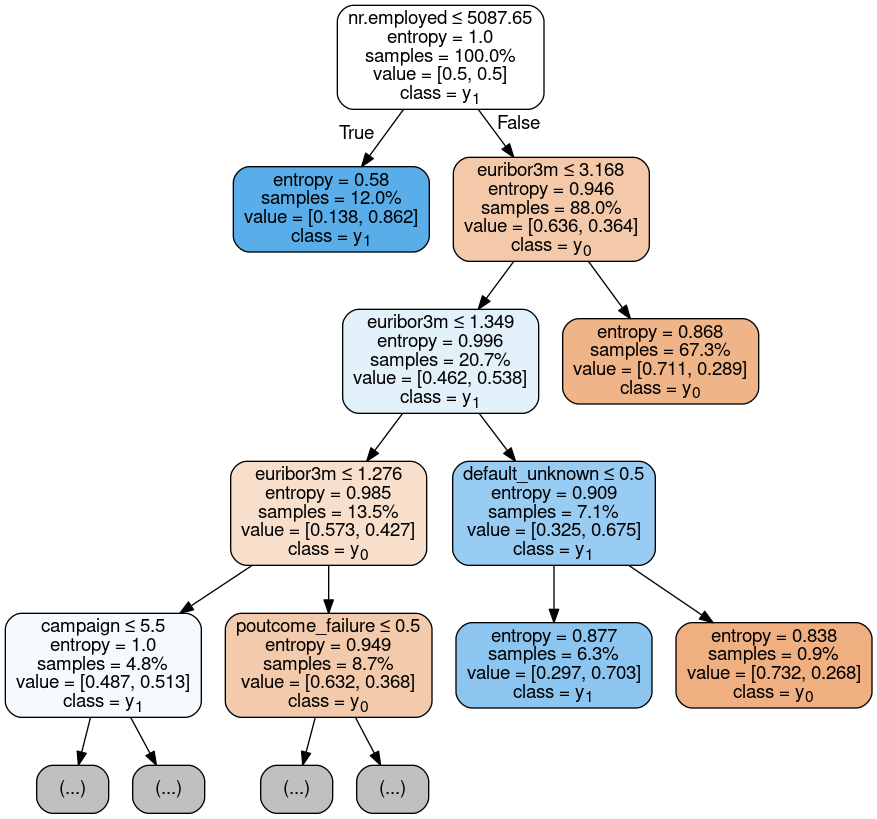

In [58]:
from sklearn.metrics import confusion_matrix
clf=tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=2,min_impurity_split=0.9,class_weight='balanced')
clf = clf.fit(Xn_learn, y_learn)
pred = clf.predict(Xn_test)

probs = clf.predict_proba(Xn_test)
# Generate predictions using probabilities and threshold found on 10 folds cross-validation
pred = filterp(thdef,probs[:,1])

# Obtain accuracy score of learned classifier on test data
print(clf.score(Xn_test, y_test))
print(confusion_matrix(y_test, pred))
print()
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, pred))
print()
print(sklearn.metrics.classification_report(y_test, pred))
epsilon = sklearn.metrics.accuracy_score(y_test, pred)
proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test')





dot_data = StringIO() 
tree.export_graphviz(clf, impurity= True, proportion= True, class_names= True, max_depth= 4, out_file=dot_data,    
                         filled=True, rounded=True,
                         feature_names=list(Xn_learn.columns.values),  
                         special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  